# Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [58]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics
import numpy as np
import scipy.stats as sts
from scipy import stats

### 1 Загрузите файл HR.csv в pandas dataframe

In [14]:
# Делаем ренейм столбца Work_accident, приводим в нижний регистр
df_hr = pd.read_csv('https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1').rename(columns={'Work_accident':'work_accident'})
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2 Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [15]:
# Сбор статистики для непрерывных величин
for col in df_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]:
    print(f'{col}:\n{df_hr[col].describe()}\n')

satisfaction_level:
count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

last_evaluation:
count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

number_project:
count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

average_montly_hours:
count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

time_spend_company:
count    14999.000000
mean         3.4

In [17]:
# Сбор статистики для категориальных величин
for col in df_hr[['work_accident', 'left', 'promotion_last_5years', 'department', 'salary']]:
    print(f'mode {col}: {df_hr[col].mode()[0]}')
    if col not in ('department', 'salary'):
        print(f'min {col}: {min(df_hr[col])}')
        print(f'max {col}: {max(df_hr[col])}')
    value_cat = dict(df_hr[col].value_counts())
    print(f'counts category {col}: {value_cat}\n') # кол-во по категориям (для 4 и 5 задания)

mode work_accident: 0
min work_accident: 0
max work_accident: 1
counts category work_accident: {0: 12830, 1: 2169}

mode left: 0
min left: 0
max left: 1
counts category left: {0: 11428, 1: 3571}

mode promotion_last_5years: 0
min promotion_last_5years: 0
max promotion_last_5years: 1
counts category promotion_last_5years: {0: 14680, 1: 319}

mode department: sales
counts category department: {'sales': 4140, 'technical': 2720, 'support': 2229, 'IT': 1227, 'product_mng': 902, 'marketing': 858, 'RandD': 787, 'accounting': 767, 'hr': 739, 'management': 630}

mode salary: low
counts category salary: {'low': 7316, 'medium': 6446, 'high': 1237}



In [18]:
# Для столбцов "department" и "salary" не учитываем min и max, так как для данных столбцов будет учитываться литеральное значение.
# в принципе и для других столбцов данные статистики можно опустить, так как они принимают булевое значение
# главная статистика в данном случае - распределение по категориям.

### 3 Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

<Axes: >

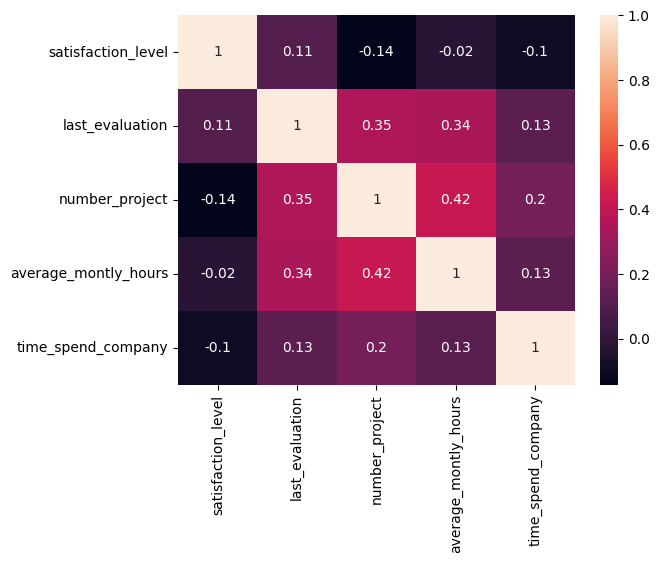

In [33]:
corr_matrix = df_hr[[
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company']].corr()

sns.heatmap(corr_matrix, annot = True)

In [ ]:
# наиболее скоррелированные величины - "average_montly_hours" и "number_project",
# то есть среднее количество часов на рабочем месте в месяц коррелирует с количеством проектов, выполненных за время работы

# наименее скоррелированные величины - "satisfaction_level" и "average_montly_hours",
# то есть среднее количество часов на рабочем месте в месяц наименее коррелирует с уровнем удовлетворенности

### 4 Рассчитайте сколько сотрудников работает в каждом департаменте.

In [28]:
df_hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Text(0.5, 1.0, 'Распределение сотрудников по департаментам')

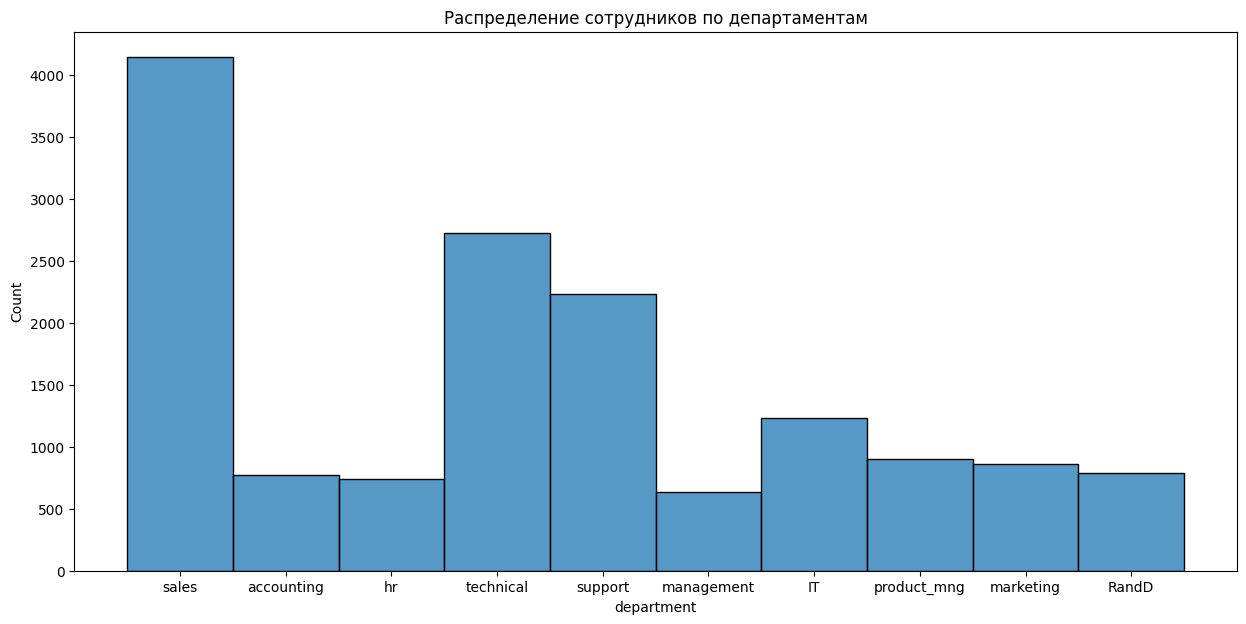

In [79]:
plt.figure(figsize=(15, 7))
department_histplot =  sns.histplot(data=df_hr, x='department')
department_histplot.set_title('Распределение сотрудников по департаментам')

### 5 Показать распределение сотрудников по зарплатам.

In [44]:
df_hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Text(0.5, 1.0, 'Распределение сотрудников по з/п')

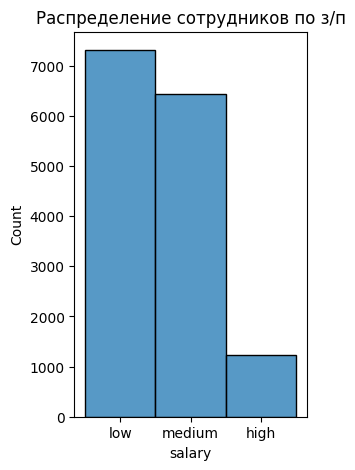

In [75]:
plt.figure(figsize=(3, 5))
salary_histplot = sns.histplot(data=df_hr, x='salary')
salary_histplot.set_title('Распределение сотрудников по з/п')

### 6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [47]:
df_hr[['department', 'salary']].groupby(['department', 'salary']).value_counts()

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
dtype: int64

Text(0.5, 1.0, 'Распределение зарплат сотрудников по каждому департаменту')

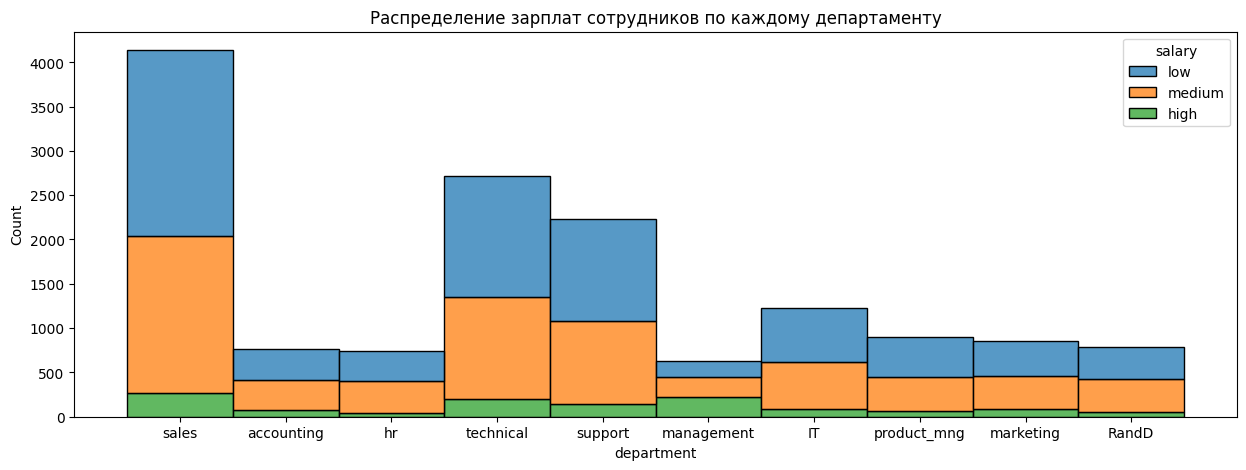

In [77]:
plt.figure(figsize=(15, 5))

g = sns.histplot(data=df_hr, x='department', hue='salary', multiple="stack")
g.set_title('Распределение зарплат сотрудников по каждому департаменту')

### 7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Text(0.5, 1.0, 'Распределение времени работы сотрудниов с низким окладом')

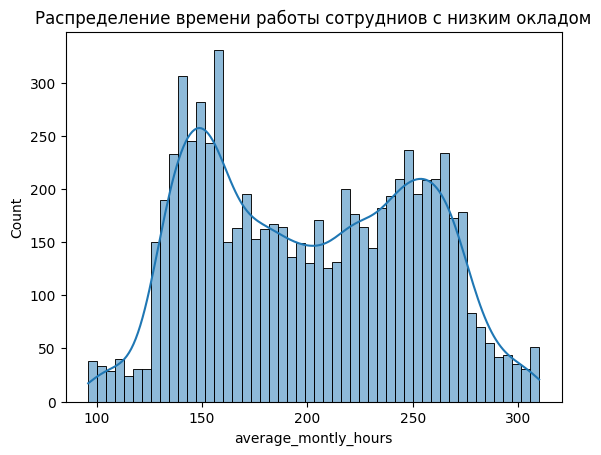

In [116]:
low_salary = sns.histplot(data=df_hr, x=df_hr[df_hr["salary"] == 'low']["average_montly_hours"], kde=True, bins=50)
low_salary.set_title('Распределение времени работы сотрудниов с низким окладом')

Text(0.5, 1.0, 'Распределение времени работы сотрудниов с высоким окладом')

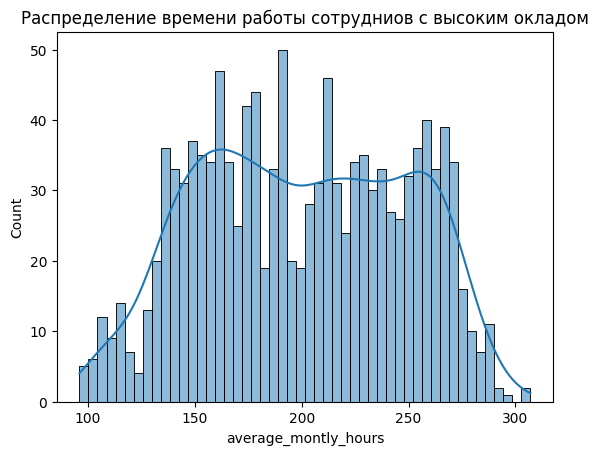

In [117]:
high_salary = sns.histplot(data=df_hr, x=df_hr[df_hr["salary"] == 'high']["average_montly_hours"], kde=True, bins=50)
high_salary.set_title('Распределение времени работы сотрудниов с высоким окладом')

In [128]:
# Нулевая гипотеза - сотрудники с высоким окладом проводят столько же времени, что и сотрудники с низким окладом
df_hr_high = df_hr[df_hr['salary'] == 'high'][['average_montly_hours']]
df_hr_low = df_hr[df_hr['salary'] == 'low'][['average_montly_hours']]
t_statistic, p_value = stats.ttest_ind(df_hr_high, df_hr_low)

print(f'Т-статитика: {t_statistic[0]:.5%}\nP_значение: {p_value[0]:.5%}\nP_значение меньше 0.05: {p_value[0] < 0.05}')
# Нельзя отвергать нулевую гипотезу -> можно предположить, что сотрудники с высоким окладом не проводят больше времени на работе, чем сотрудники с низким окладом

Т-статитика: -72.88680%
P_значение: 46.61023%
P_значение меньше 0.05: False


### 8 Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [130]:
# Разделим датасет на 2 выборки
df_hr_left = df_hr[df_hr['left'] == 1]
df_hr_not_left = df_hr[df_hr['left'] == 0]

In [149]:
# Доля сотрудников с повышением за последние 5 лет
isnt_prom, is_prom = df_hr_left['promotion_last_5years'].value_counts()
print(f'Среди уволившихся сотрудников доля тех, кто был повышен за последние 5 лет, составляет: {is_prom/isnt_prom}')

isnt_prom, is_prom = df_hr_not_left['promotion_last_5years'].value_counts()
print(f'Среди работающих сотрудников доля тех, кто был повышен за последние 5 лет, составляет: {is_prom/isnt_prom}')

Среди уволившихся сотрудников доля тех, кто был повышен за последние 5 лет, составляет: 0.005349099099099099
Среди работающих сотрудников доля тех, кто был повышен за последние 5 лет, составляет: 0.02695902228612509


In [157]:
# Средняя степень удовлетворенности
print(f'Средняя степень удовлетворенности уволившихся сотрудников составляет: {df_hr_left["satisfaction_level"].mean()}')
print(f'Средняя степень удовлетворенности работающих сотрудников составляет: {df_hr_not_left["satisfaction_level"].mean()}')

Средняя степень удовлетворенности уволившихся сотрудников составляет: 0.4400980117614114
Средняя степень удовлетворенности работающих сотрудников составляет: 0.666809590479524


In [158]:
# Среднее количество проектов
print(f'Среднее количество проектов уволившихся сотрудников составляет: {df_hr_left["number_project"].mean()}')
print(f'Среднее количество проектов уволившихся сотрудников составляет: {df_hr_not_left["number_project"].mean()}')

Среднее количество проектов уволившихся сотрудников составляет: 3.8555026603192384
Среднее количество проектов уволившихся сотрудников составляет: 3.786664333216661


### 9 Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [160]:
test_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years']

In [161]:
# Определяем размер тестовой выборки в 20%
x_train, x_test, y_train, y_test = train_test_split(
    df_hr[test_columns],
    df_hr['left'],
    test_size=0.2
    )

In [162]:
lda = LDA()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [163]:
# Используем LDA модель
predict = lda.predict(x_test)
predict

array([0, 1, 0, ..., 0, 0, 0])

In [177]:
result = pd.DataFrame([y_test, predict]).T
result.columns=['target','prediction']

result.dropna()

,target,prediction
37,1.0,0.0
1712,1.0,0.0
2933,0.0,0.0
619,1.0,0.0
1303,1.0,0.0
...,...,...
1455,1.0,0.0
2047,0.0,1.0
2828,0.0,0.0
2514,0.0,0.0


In [178]:
accuracy = accuracy_score(y_test, predict)

print(f'Точность прдсказания: {accuracy:.2%}')

Точность прдсказания: 75.63%
